# Plots y visualización de los datos

In [28]:
import pandas as pd
import os
import numpy as np

In [4]:
import matplotlib.pyplot as plt

# Problemas de funcionamiento pasa por:
# + Desinstalar, actualizar, reinstalar y volver a cargar el kernel en jupyter

In [5]:
# Path para leer los archivos del tuto
read_path = "/Users/snopv/PycharmProjects/DataScience_Python/datasets/"
# Path para guardar los archivos
save_path = "/Users/snopv/PycharmProjects/DataScience_Python/my_datasets/"
# Archivo
filename = "customer-churn-model/Customer Churn Model.txt"

# Fullpath de lectura
read_fullpath = os.path.join(read_path,filename)

In [6]:
data = pd.read_csv(read_fullpath)

In [7]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [12]:
# Para que el plot quede dentro de la misma celda 
%matplotlib inline

In [9]:
# Para guardar la img en un directiorio

#savefig("path_donde_guardar_img.jpeg")

### Scatter Plot

Es una nube de dispersión o de puntos

Se utiliza cuando se sospecha que hay una correlación entre dos variables

<AxesSubplot:xlabel='Day Mins', ylabel='Day Charge'>

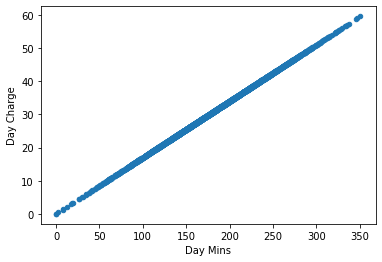

In [10]:
# Ejemplo: "day charge" y "day mins" -> A más carga mas dura 

data.plot(kind="scatter", x="Day Mins", y = "Day Charge")

<AxesSubplot:xlabel='Night Mins', ylabel='Night Charge'>

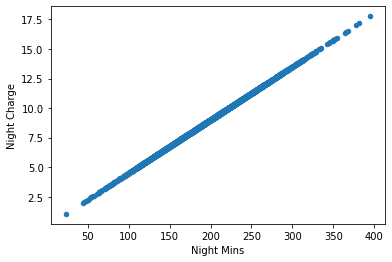

In [11]:
# Ejemplo: Carga de noche y duracion 

data.plot(kind="scatter", x="Night Mins", y="Night Charge")
# kind : tipo de plot

<AxesSubplot:xlabel='Night Calls', ylabel='Night Charge'>

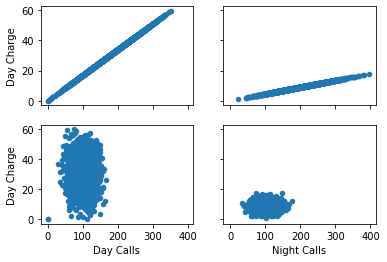

In [20]:
# Plot de 4 diagramas
figure, axs = plt.subplots(2,2, sharey=True, sharex=True)
data.plot(kind="scatter", x="Day Mins", y="Day Charge", ax=axs[0][0])
data.plot(kind="scatter", x="Night Mins", y="Night Charge", ax=axs[0][1])
data.plot(kind="scatter", x="Day Calls", y="Day Charge", ax=axs[1][0])
data.plot(kind="scatter", x="Night Calls", y="Night Charge", ax=axs[1][1])

### Histograma de frecuencias

Text(0.5, 1.0, 'Histograma del número de llamadas al día')

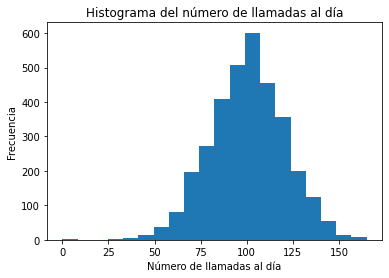

In [26]:
plt.hist(data["Day Calls"], bins =20)
#bins = numero de divisiones
plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma del número de llamadas al día")


__Regla de Sturge__

Número de divisiones que hay que hacer en un histograma

En nuestro caso hay 3333 filas.

Por tanto es 1 + ln(3333)

Text(0.5, 1.0, 'Histograma del número de llamadas al día')

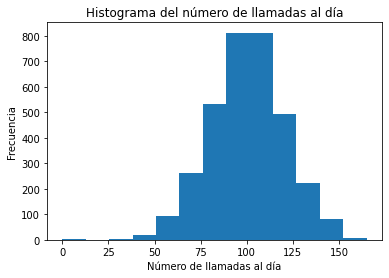

In [31]:
k = int(np.ceil(1+np.log2(3333)))
# ceil -> redondeo hacia arriba

plt.hist(data["Day Calls"], bins = k)
#bins = numero de divisiones
plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma del número de llamadas al día")

### Boxplot, diagrama de caja y bigotes

Text(0.5, 1.0, 'Boxplot de las llamadas diarias')

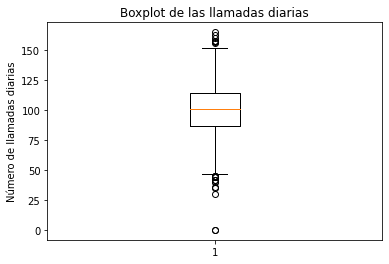

In [35]:
plt.boxplot(data["Day Calls"])
plt.ylabel("Número de llamadas diarias")
plt.title("Boxplot de las llamadas diarias")

In [36]:
# Ver resumen de la columna "day calls"
data["Day Calls"].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

__Explicación Boxplot__

+ La linea naranja: mediana o percentil 50%
+ Parte superior de la caja: percentil 75%
    - Por la parte superior de la caja quedan un cuarto de los datos
+ Parte inferior de la caja: percentil 25%
    - Por la parte inferior de la caja quedan un cuarto de los datos
+ La caja: abarca el 50% de los datos
+ La moda: El que mas aparece
+ Promedio (mean): suma de todos div entre la cantidad total

Rango intercuartil:

In [40]:

IQR = 114-87
IQR

27

In [41]:
# Rango intercuartil con los datos directos
IQR = data["Day Calls"].quantile(0.75)-data["Day Calls"].quantile(0.25)
IQR

27.0

Dónde empiezan y acaban los bigotes:

In [42]:
# Bigote inferior
data["Day Calls"].quantile(0.25) - 1.5*IQR

46.5

In [44]:
# Bigote superior
data["Day Calls"].quantile(0.75) + 1.5*IQR

154.5

Todo lo que supera 1.5 veces por debajo del primer cuartil o 1.5 veces
por arriba del tercer cuartil se le llama __outlier__ "valor fuera de lugar"

Normalmente estos valores se pintan con "bolitas"